In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [11]:
list1 = [random.randint(1, 100) for _ in range(100)]
list2 = [random.randint(1, 100) for _ in range(100)]

print("Первый список:", list1)
print("Второй список:", list2)

Первый список: [13, 51, 18, 56, 39, 52, 16, 50, 26, 18, 50, 80, 12, 58, 17, 28, 84, 22, 51, 41, 100, 49, 83, 12, 53, 49, 76, 43, 25, 14, 31, 42, 46, 39, 62, 31, 19, 74, 52, 44, 22, 82, 36, 52, 26, 13, 20, 4, 12, 8, 18, 100, 3, 39, 82, 17, 24, 64, 75, 51, 92, 10, 32, 22, 96, 5, 56, 85, 22, 32, 91, 38, 25, 9, 4, 2, 95, 42, 86, 47, 79, 68, 76, 36, 65, 3, 27, 66, 96, 9, 8, 2, 16, 34, 96, 41, 90, 93, 83, 67]
Второй список: [77, 36, 90, 56, 85, 22, 27, 42, 74, 22, 57, 1, 31, 38, 4, 68, 9, 73, 28, 45, 6, 67, 38, 57, 11, 12, 27, 84, 17, 35, 79, 74, 22, 10, 53, 62, 85, 93, 65, 28, 36, 5, 62, 39, 12, 18, 85, 81, 62, 43, 68, 16, 98, 80, 14, 28, 3, 33, 29, 59, 75, 33, 51, 90, 52, 100, 54, 63, 38, 81, 65, 12, 27, 65, 75, 68, 26, 96, 54, 97, 47, 71, 92, 67, 77, 70, 93, 40, 78, 76, 71, 19, 52, 54, 32, 46, 18, 71, 19, 64]


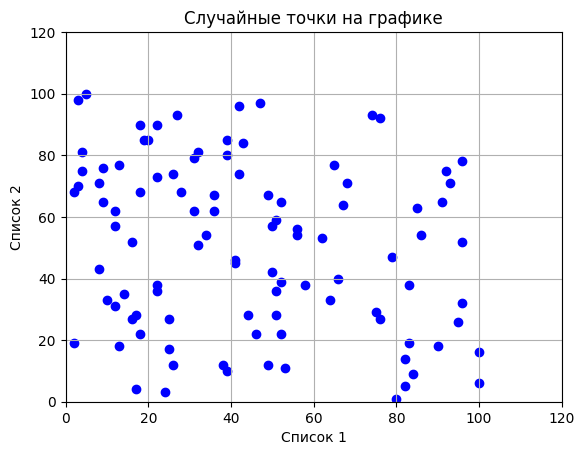

In [14]:
plt.scatter(list1, list2, color='blue', marker='o')
plt.title('Случайные точки на графике')
plt.xlabel('Список 1')
plt.ylabel('Список 2')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.grid()
plt.show()

In [25]:
def linear_model(x, a, b):
    return a * x + b

def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model(x, a, b):
    return a * np.exp(b * x)

def logarithmic_model(x, a, b):
    return a * np.log(x) + b

def hyperbolic_model(x, a, b):
    return a / x + b

def fit_and_plot_lists_2(x, y):
    x = np.array(x)
    y = np.array(y)
    
    # Линейная регрессия
    popt_linear, _ = curve_fit(linear_model, x, y)
    linear_fit = linear_model(x, *popt_linear)
    r_squared_linear = stats.linregress(x, y)[2]**2

    # Полиномиальная регрессия (2-й степени)
    popt_poly, _ = curve_fit(polynomial_model, x, y)
    poly_fit = polynomial_model(x, *popt_poly)
    r_squared_poly = 1 - (np.sum((y - poly_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Кубическая регрессия (3-й степени)
    popt_cubic, _ = curve_fit(cubic_model, x, y)
    cubic_fit = cubic_model(x, *popt_cubic)
    r_squared_cubic = 1 - (np.sum((y - cubic_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Экспоненциальная регрессия
    popt_exp, _ = curve_fit(exponential_model, x, y)
    exp_fit = exponential_model(x, *popt_exp)
    r_squared_exp = 1 - (np.sum((y - exp_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Логарифмическая регрессия
    popt_log, _ = curve_fit(logarithmic_model, x, y, bounds=(0, [3., 3.]))
    log_fit = logarithmic_model(x, *popt_log)
    r_squared_log = 1 - (np.sum((y - log_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Гиперболическая регрессия
    popt_hyper, _ = curve_fit(hyperbolic_model, x, y)
    hyper_fit = hyperbolic_model(x, *popt_hyper)
    r_squared_hyper = 1 - (np.sum((y - hyper_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Выбор наилучшей модели
    r_squared_values = {
        "linear": r_squared_linear,
        "polynomial": r_squared_poly,
        "cubic": r_squared_cubic,
        "exponential": r_squared_exp,
        "logarithmic": r_squared_log,
        "hyperbolic": r_squared_hyper
    }

    best_fit_type = max(r_squared_values, key=r_squared_values.get)
    best_fit_r_squared = r_squared_values[best_fit_type]

    # Определим лучшие параметры для вывода
    if best_fit_type == "linear":
        best_params = popt_linear
        fit_func = f"{best_params[0]:.4f}x + {best_params[1]:.4f}"
    elif best_fit_type == "polynomial":
        best_params = popt_poly
        fit_func = f"{best_params[0]:.4f}x^2 + {best_params[1]:.4f}x + {best_params[2]:.4f}"
    elif best_fit_type == "cubic":
        best_params = popt_cubic
        fit_func = f"{best_params[0]:.4f}x^3 + {best_params[1]:.4f}x^2 + {best_params[2]:.4f}x + {best_params[3]:.4f}"
    elif best_fit_type == "exponential":
        best_params = popt_exp
        fit_func = f"{best_params[0]:.4f} * e^({best_params[1]:.4f}x)"
    elif best_fit_type == "logarithmic":
        best_params = popt_log
        fit_func = f"{best_params[0]:.4f} * log(x) + {best_params[1]:.4f}"
    elif best_fit_type == "hyperbolic":
        best_params = popt_hyper
        fit_func = f"{best_params[0]:.4f} / x + {best_params[1]:.4f}"

    # График
    plt.scatter(x, y, label='Данные', color='blue')
    if best_fit_type == "linear":
        plt.plot(x, linear_fit, label=f'Линейная: y={fit_func}', color='red')
    elif best_fit_type == "polynomial":
        plt.plot(x, poly_fit, label=f'Полином: y={fit_func}', color='green')
    elif best_fit_type == "cubic":
        plt.plot(x, cubic_fit, label=f'Кубический: y={fit_func}', color='purple')
    elif best_fit_type == "exponential":
        plt.plot(x, exp_fit, label=f'Экспоненциальная: y={fit_func}', color='orange')
    elif best_fit_type == "logarithmic":
        plt.plot(x, log_fit, label=f'Логарифмическая: y={fit_func}', color='brown')
    elif best_fit_type == "hyperbolic":
        plt.plot(x, hyper_fit, label=f'Гиперболическая: y={fit_func}', color='pink')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Подгонка данных')
    plt.legend()
    plt.grid()
    plt.show()

    return best_fit_type, best_fit_r_squared, fit_func


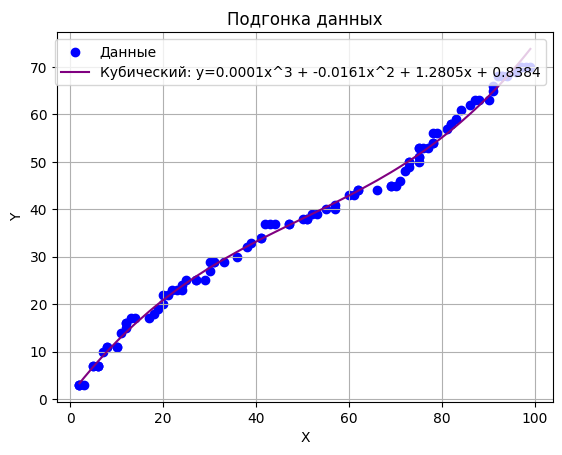

('cubic', 0.9951880075900524, '0.0001x^3 + -0.0161x^2 + 1.2805x + 0.8384')

In [30]:
# Пример использования
x_data = sorted([random.randint(2, 100) for _ in range(100)])
y_data = sorted([random.randint(3, 70) for _ in range(100)])

fit_and_plot_lists_2(x_data, y_data)

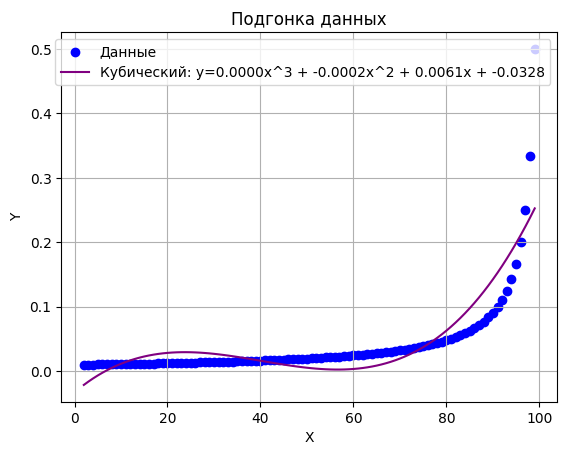

('cubic', 0.7552717049601484, '0.0000x^3 + -0.0002x^2 + 0.0061x + -0.0328')

In [33]:
x_data = sorted([i for i in range(2, 100)])
y_data = sorted([1/i for i in range(2, 100)])
fit_and_plot_lists_2(x_data, y_data)